# <center>Portuguese Bank Marketing Analytics

# Table of Contents
1. **[Project Background](#1)**
2. **[Load the data and Examine the data](#2)**
3. **[Data Cleaning](#3)**
4. **[Exploratory Data Analysis](#4)**
5. **[Data Visualization](#5)**
6. **[Machine Learning: Classification](#6)**
7. **[Conclusion & Recommendations](#7)**

### 1. Project Background

Portuguese bank lost their revenue, and they wanted to investigate why their revenue declined. So, they can take necessary steps to solve bank problems. After deep analysis, they discovered that the main reason is that their clients are not depositing as frequently as before. Expressive to term deposits allow banks to hold onto a deposit for certain amount of time, so banks can invest in higher gain financial products to make a profit. Furthermore, banks also hold better chance to encourage term deposit clients into buying other products such as funds or insurance to further increase their revenues. Consequently, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

###### This Jupyter Notebook loads, explores, and visualizes the Bank Marketing datasets. Also, builds and tests several predictive models, and then predict if client will subscribe a term deposit on test data using the best model.

In [1]:
# Current workspace
!pwd

/Users/suroor/Desktop/Springboard/Bank-Marketing-Client-Subscription-/Bank-Marketing-Client-Subscription-


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.utils import shuffle

%matplotlib inline

###  2. Load the data and Examine the data

In [3]:
#Load csv file to pd dataframe
bank_data = pd.read_csv("bank-additional-full.csv",sep=';')

#### <font color=green>*Examine the data*</font>

In [4]:
# Columns information
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# print first five rows of bank_data
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# display total number of rows and columns
bank_data.shape

(41188, 21)

In [7]:
# know bak_data information 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [8]:
# Describe numeric bank_data
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
# check the occurrence of each job in bank_data
bank_data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

### 3. Data Cleaning

<img src='https://www.officedepot.com/resource/blob/60908/0f84e67038ac7cd8966cacaaab7f92fb/know-what--and-when--to-purge-data.gif' width='500'>

#### *Check for Duplicates*

In [10]:
bank_data.duplicated().sum()

12

#### <font color=green>*Check invalid or corrupt data and remove it*</font>

In [11]:
'''remove duplicated rows'''
def clean_data(data):
    clean_data = data.drop_duplicates()
    return clean_data

In [12]:
clean_bank_data = clean_data(bank_data)
clean_bank_data.shape

(41176, 21)

In [13]:
clean_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
age               41176 non-null int64
job               41176 non-null object
marital           41176 non-null object
education         41176 non-null object
default           41176 non-null object
housing           41176 non-null object
loan              41176 non-null object
contact           41176 non-null object
month             41176 non-null object
day_of_week       41176 non-null object
duration          41176 non-null int64
campaign          41176 non-null int64
pdays             41176 non-null int64
previous          41176 non-null int64
poutcome          41176 non-null object
emp.var.rate      41176 non-null float64
cons.price.idx    41176 non-null float64
cons.conf.idx     41176 non-null float64
euribor3m         41176 non-null float64
nr.employed       41176 non-null float64
y                 41176 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

### 4. Exploratory Data Analysis

<img src='http://piesiecreativity.com/wp-content/uploads/2018/02/Online-online.gif' width='500'>

In [14]:
'''Divide varibles in categorical and numerical'''
categorical_vars = [col for col in clean_bank_data.columns if (clean_bank_data[col].dtype == 'object') & (col != 'y')]
numeric_vars = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
target_var = ['y']

In [15]:
# seperate feature and traget variables
X = clean_bank_data.iloc[:,:-1]
y = clean_bank_data.iloc[:,-1]

In [16]:
# know target variable data
y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [17]:
X['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

#### *Summarize numeric variable*

In [18]:
X.describe(include=[np.number])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### *summarize categorical variable*

In [19]:
X.describe(include = ['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551


#### *Find Correction of variables*

In [20]:
def get_correlation(data):
    return data.corr()

corr_data = get_correlation(X)
corr_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


### 5. Data Visualization

<img src='https://media0.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif' width='500'>

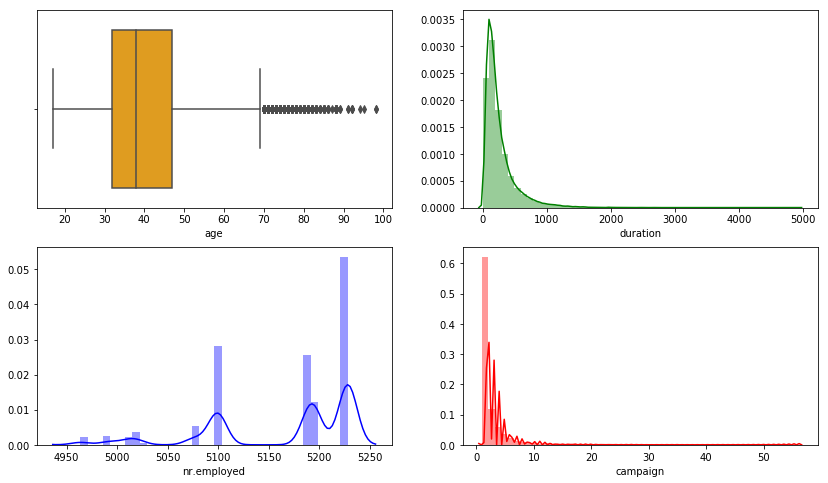

In [21]:
plt.figure(figsize = (14, 8))
plt.subplot(2,2,1)
sns.boxplot(X.age, color='Orange')
plt.subplot(2,2,2)
sns.distplot(X.duration, color='green')
plt.subplot(2,2,3)
sns.distplot(X['nr.employed'], color='blue')
plt.subplot(2,2,4)
sns.distplot(X.campaign, color='red')
plt.show()

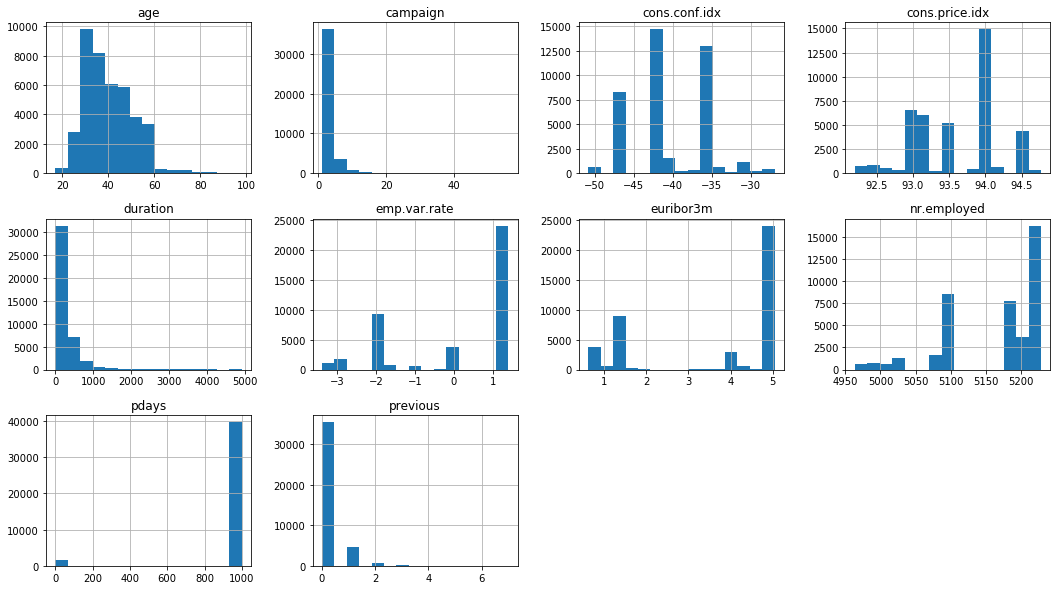

In [22]:
X[numeric_vars].hist(bins=15, figsize=(18, 10), layout=(3, 4))
plt.show()

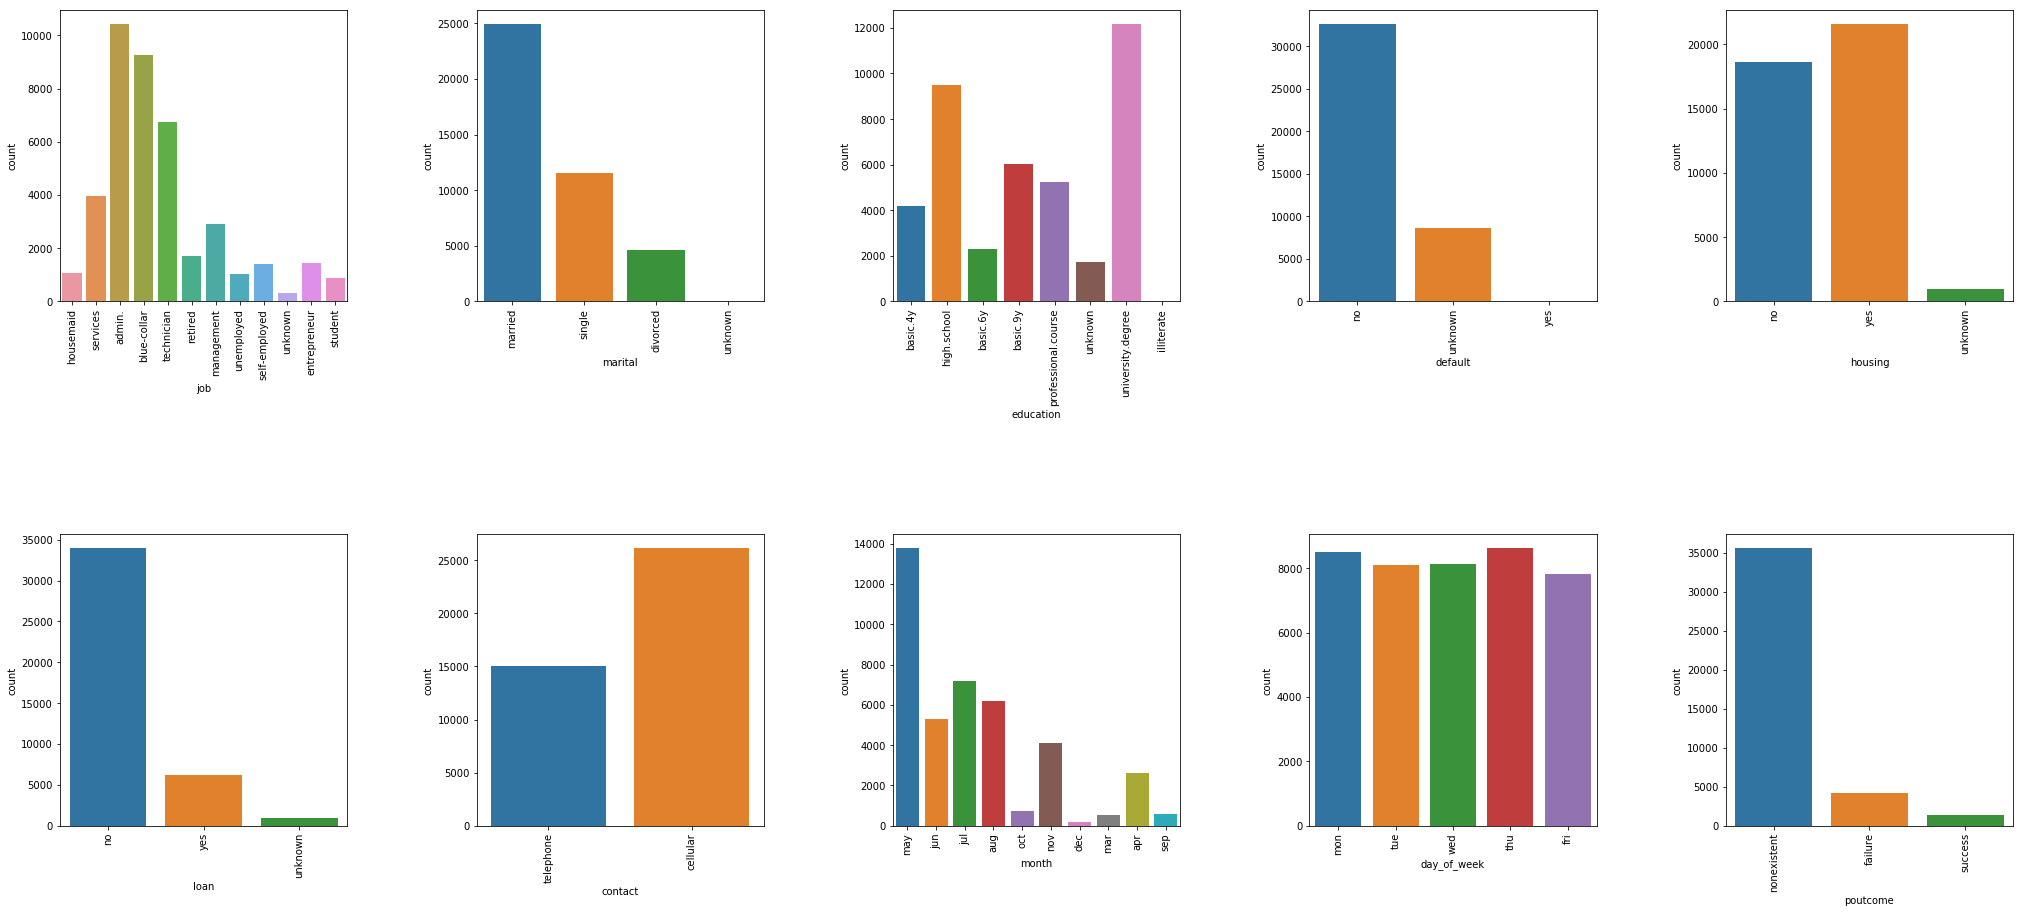

In [23]:
# Visualize all categorical variables
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(X[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)


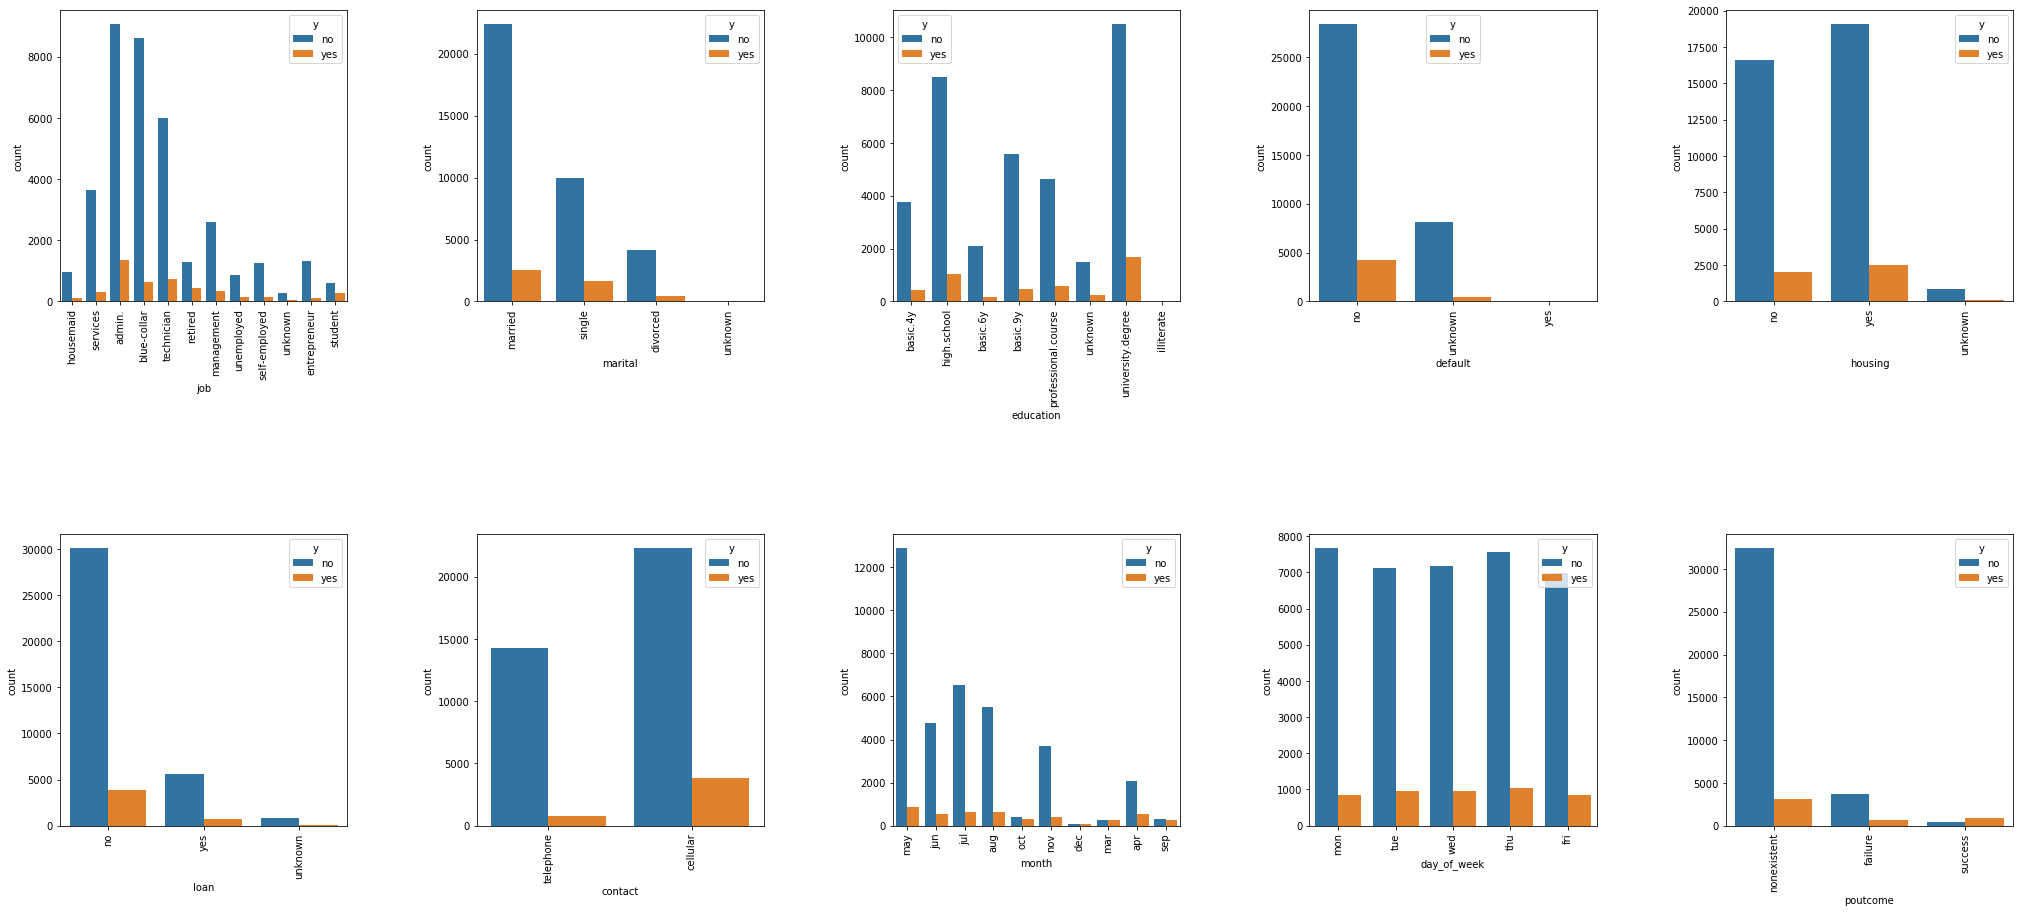

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(35, 15))
for variable, subplot in zip(categorical_vars, ax.flatten()):
    sns.countplot(x=variable,hue='y',data=clean_bank_data,ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.subplots_adjust(wspace=0.45, hspace=0.8)

In [25]:
# Visualize all numeric variables
#sns.pairplot(clean_bank_data, hue='y')
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


### 6. Machine Learning: Classification

<img src='https://cdn-images-1.medium.com/max/1600/0*NbQlrmQFOsjPFB-f.gif' width='500'>

In [26]:
# import LabelEncoder and instantiate object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# apply LabelEncoder object on categorical columns
X = X.apply(le.fit_transform)
X.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8
5,28,7,1,2,1,0,0,1,6,1,198,0,26,0,1,8,18,16,287,8
6,42,0,1,5,0,0,0,1,6,1,139,0,26,0,1,8,18,16,287,8
7,24,1,1,7,1,0,0,1,6,1,217,0,26,0,1,8,18,16,287,8
8,7,9,2,5,0,2,0,1,6,1,380,0,26,0,1,8,18,16,287,8
9,8,7,2,3,0,2,0,1,6,1,50,0,26,0,1,8,18,16,287,8


In [27]:
#import OneHotEncoder and instantiate object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(X)
onehotlabels = ohe.transform(X).toarray()
onehotlabels.shape

(41176, 2141)

In [28]:
onehotlabels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [29]:
y, unique = pd.factorize(y)
y

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
 #onehotlabels1 = pd.get_dummies(X)
 #onehotlabels1.shape

In [36]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(onehotlabels, y, test_size = 0.20, random_state = 10)

In [37]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
print('Training Features Shape:', X_train.shape)
print('Training test Shape:', X_test.shape)
print('Testing Features Shape:', y_train.shape)
print('Testing test Shape:', y_test.shape)

Training Features Shape: (32940, 2141)
Training test Shape: (8236, 2141)
Testing Features Shape: (32940,)
Testing test Shape: (8236,)


In [39]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 50, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [41]:
# Use the forest's predict method on the test data
y_predict = rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_predict))

#acc_random_forest = round(rf.score(X_train, y_train) * 100, 2)
#print(round(acc_random_forest,2,), "%")
#print("Confusion Matrix:")
#print(confusion_matrix(y_test,y_predict))
#print("Classification Report:")
#print(classification_report(y_test, y_predict))

Accuracy: 0.902622632346


In [42]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 128, 237, 346, 455, 564, 673, 782, 891, 1000]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf1 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=128, bootstrap=True, max_features=sqrt, max_depth=30 
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=128, bootstrap=True, max_features=sqrt, max_depth=30 
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=128, bootstrap=True, max_features=sqrt, max_depth=30 
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=1000, bootstrap=True, max_features=sqrt, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=1, n_estimators=128, bootstrap=True, max_features=sqrt, max_depth=30, total= 1.6min
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=1000, bootstrap=True, max_features=sqrt, max_depth=10 
[CV]  min_samples_split=5, min_samples_leaf=1, n_estimators=128, bootstrap=True, max_features=sqrt, max_depth=30, total= 1.6min
[CV] min_samples_split=5, min_samples_leaf=1, n_estimators=1000, bootstrap=True, max_features=sqrt, max_depth=10 


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [ ]:
for name, importance in zip(onehotlabels, rf.feature_importances_):
    print(name, "=", importance)


### 8. Conclusion & Recommendations

<img src='https://www.usefultechtips.com/wp-content/uploads/2018/01/how-to-improve-website-speed.jpg' width='600'>